# Modeling 

In [2]:
import numpy as np
import pandas as pd
from modeling import baseline_modeling, class_names
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

## Setting dataframes
- df_baseline is just numerical data
- just metadata dataframe (in the works)
- df_text is with vectorized description
    - this was already split into train and test sets to preprocess
    - going to be joined to df after splitting into train/test

In [3]:
# load in dataframe
df = pd.read_csv('csv_files/9_1_all_books_df.csv')

# this just includes pages and ratings along with the target of best seller or not
df_baseline = df[['rating', 'pages', 'best_seller']]

# this data is already split into the training set with a reset index
# so it will be concated with the df after spliting into train and test sets
df_text_X = pd.read_csv('csv_files/X_train_nlp.csv')
df_text_y= pd.read_csv('csv_files/y_train_nlp.csv', header=None)
df_text_X_test = pd.read_csv('csv_files/X_test_nlp.csv')
df_text_y_test = pd.read_csv('csv_files/y_test_nlp.csv', header=None)

# split the dataset into training and validation datasets for just numerical data
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(df_baseline[['rating', 'pages']], 
                                                                    df_baseline['best_seller'], 
                                                                    test_size = .2,
                                                                   random_state=42)

df_text = df_text_X 
df_text['_target'] = df_text_y[0]
# deep vs shallow copies
df_text_X = df_text_X.loc[:, df_text_X.columns != '_target']

## Numerical Baseline model
- On numerical data only
- the first uses the `'stratified'` strategy to predict, the second uses the `'most_frequent'` strategy

In [4]:
base = DummyClassifier(strategy= 'stratified', random_state=42)


In [5]:
# run twice to display image?
baseline_modeling(base, X_train_rating, y_train_rating)

{'clf score': 0.663023679417122, 'clf confusion': array([[681, 190],
        [180,  47]])}

{'clf score': 0.6618181818181819, 'clf confusion': array([[165,  48],
        [ 45,  17]])}

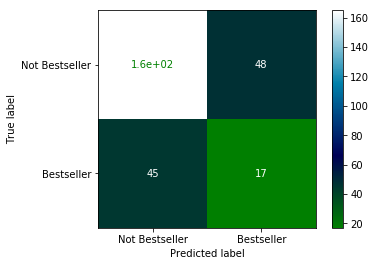

In [41]:
baseline_modeling(base, X_test_rating, y_test_rating)

# Tree based Modeling

## Numerical Random Forest

In [6]:
rf = RandomForestClassifier(random_state=42)

{'clf score': 0.982695810564663, 'clf confusion': array([[868,   3],
        [ 16, 211]])}

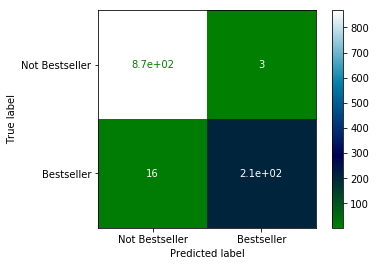

In [7]:
baseline_modeling(rf, X_train_rating, y_train_rating)

{'clf score': 0.982695810564663, 'clf confusion': array([[868,   3],
        [ 16, 211]])}

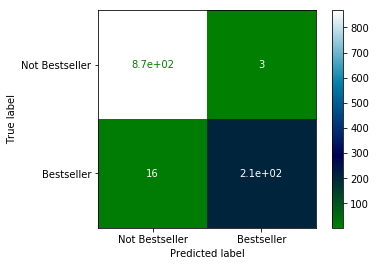

In [8]:
baseline_modeling(rf, X_train_rating, y_train_rating)

In [9]:
# random_forest.decision_path(X_train_rating)

In [10]:
# random_forest.decision_path(X_test_rating)

In [11]:
# random_forest.feature_importances_

## Text Modeling Random Forest

In [12]:
rf_text = RandomForestClassifier(random_state=42)

{'clf score': 0.98816029143898, 'clf confusion': array([[869,   2],
        [ 11, 216]])}

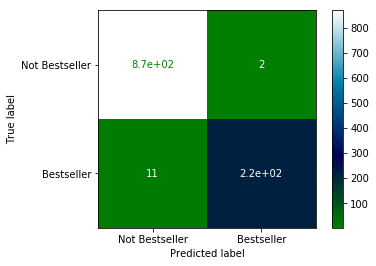

In [13]:
baseline_modeling(rf_text, df_text_X, df_text_y[0])


In [14]:
rf_text.score(df_text_X, df_text_y[0])

0.98816029143898

# Logistic Regression

## Numerical Logistic

In [15]:
log  = LogisticRegression(random_state=42)

{'clf score': 0.807832422586521, 'clf confusion': array([[862,   9],
        [202,  25]])}

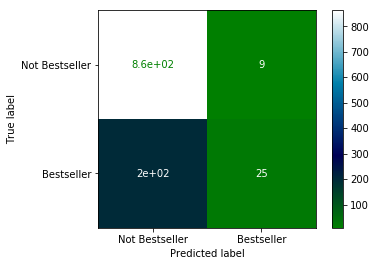

In [16]:
baseline_modeling(log, X_train_rating, y_train_rating)

In [17]:
log_cv = LogisticRegressionCV(cv = 5, random_state=42)

{'clf score': 0.8060109289617486, 'clf confusion': array([[860,  11],
        [202,  25]])}

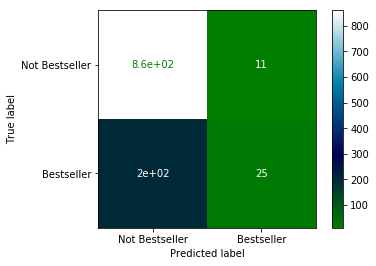

In [18]:
baseline_modeling(log_cv, X_train_rating, y_train_rating)

## Text Modeling Logistic 

In [19]:
log_text = LogisticRegression(random_state=42)

{'clf score': 0.9653916211293261, 'clf confusion': array([[871,   0],
        [ 38, 189]])}

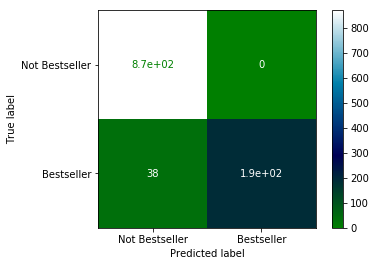

In [20]:
baseline_modeling(log_text, df_text_X, df_text_y[0])

In [21]:
# max iterations needed to be 100 -> 400 
log_text_cv = LogisticRegressionCV(cv = 5, max_iter=400, random_state=42)

{'clf score': 0.9389799635701275, 'clf confusion': array([[871,   0],
        [ 67, 160]])}

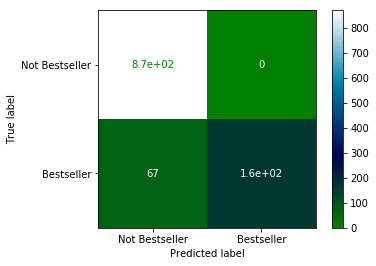

In [22]:
baseline_modeling(log_text_cv, df_text_X, df_text_y[0] )

the cross validated logistic fit the training data slightly less.

# testing data

0.7709090909090909

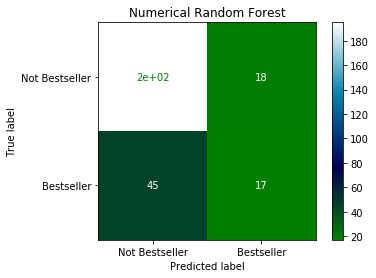

In [34]:
# rf on testing data
# baseline_modeling(rf, X_train_rating, y_train_rating)
rf_test_preds = rf.predict(X_test_rating)
rf_confusion = confusion_matrix(y_test_rating, rf_test_preds)
rf_plot_confusion = plot_confusion_matrix(rf, X_test_rating, y_test_rating, cmap='ocean', 
                                          display_labels=class_names).ax_.set_title('Numerical Random Forest')
rf_score = rf.score(X_test_rating, y_test_rating)
rf_score

In [24]:
rf_confusion

array([[195,  18],
       [ 45,  17]])

0.8109090909090909

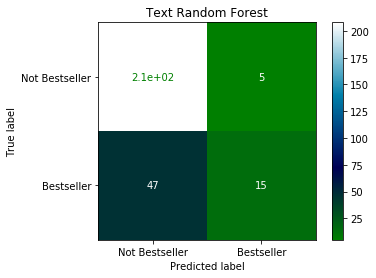

In [35]:
# rf on text testing data
# df_text_X_test, y_test_rating or df_text_y_test
rf_text_test_preds = rf_text.predict(df_text_X_test)
rf_text_confusion = confusion_matrix(df_text_y_test, rf_text_test_preds)
rf_text_plot_confusion = plot_confusion_matrix(rf_text, df_text_X_test, df_text_y_test, cmap='ocean', 
                                               display_labels=class_names).ax_.set_title('Text Random Forest')
rf_text_score = rf_text.score(df_text_X_test, df_text_y_test)
rf_text_score

In [26]:
rf_text_confusion

array([[208,   5],
       [ 47,  15]])

0.7927272727272727

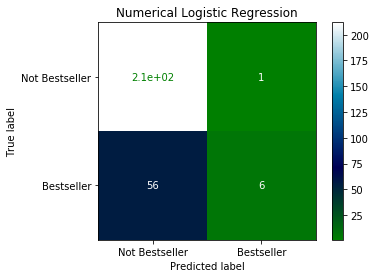

In [38]:
# log on testing data
# baseline_modeling(rf, X_train_rating, y_train_rating)
log_test_preds = log.predict(X_test_rating)
log_confusion = confusion_matrix(y_test_rating, log_test_preds)
log_plot_confusion = plot_confusion_matrix(log, X_test_rating, y_test_rating, cmap='ocean',
                                           display_labels=class_names).ax_.set_title('Numerical Logistic Regression')
log_score = log.score(X_test_rating, y_test_rating)
log_score

In [28]:
log_confusion

array([[212,   1],
       [ 56,   6]])

0.8036363636363636

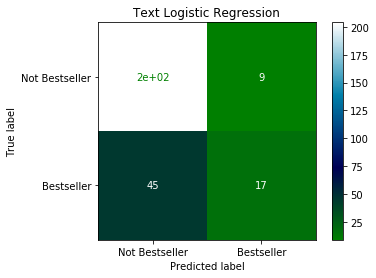

In [39]:
# log on text testing data
# df_text_X_test, y_test_rating or df_text_y_test
log_text_test_preds = log_text.predict(df_text_X_test)
log_text_confusion = confusion_matrix(df_text_y_test, log_text_test_preds)
log_text_plot_confusion = plot_confusion_matrix(log_text, df_text_X_test, df_text_y_test, cmap='ocean',
                                                display_labels=class_names).ax_.set_title('Text Logistic Regression')
log_text_score = log_text.score(df_text_X_test, df_text_y_test)
log_text_score

In [30]:
log_text_confusion

array([[204,   9],
       [ 45,  17]])

# TODO
- training data exploration
- testing data exploration